In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
train_df = pd.read_csv('F:\my project\dataset\learning_dataset\\fashion-mnist_test.csv\\fashion-mnist_test.csv')
test_df = pd.read_csv(
    'F:\my project\dataset\learning_dataset\\fashion-mnist_train.csv\\fashion-mnist_train.csv')

In [4]:
train_data = train_df.loc[:, 'pixel1':'pixel784'].values
train_label = train_df.label.values

In [5]:
test_data = test_df.loc[:, 'pixel1':'pixel784'].values
test_label = test_df.label.values

In [6]:
a1 = train_label == 0
b1 = train_label == 1
train_data1 = train_data[a1 + b1]
a2 = test_label == 0
b2 = test_label == 1
test_data1 = test_data[a2 + b2]

In [7]:
train_label1 = train_label[a1 + b1]
test_label1 = test_label[a2 + b2]

In [8]:
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
test_label

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [10]:
pca1=PCA(n_components=2)
pca1.fit(train_data1)


PCA(n_components=2)

In [11]:
tr_f=pca1.transform(train_data1)
tr_f

array([[ 1554.04715825,    23.88224915],
       [-1048.26117848,  -401.78574482],
       [  -42.79373386,   839.30732738],
       ...,
       [   53.25105473,   954.11029229],
       [  424.96222298,   515.694523  ],
       [ 1540.27834768,  -286.64419056]])

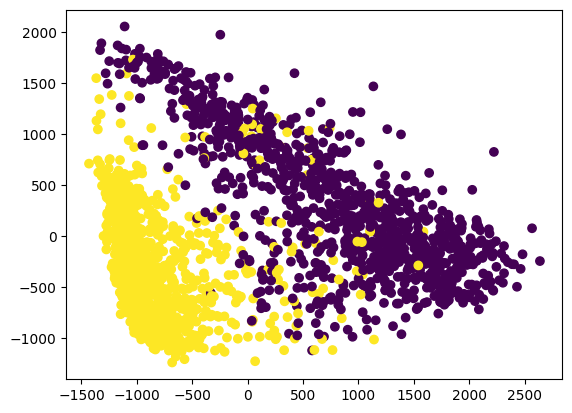

In [12]:
plt.scatter(tr_f[:,0],tr_f[:,1],c=train_label1)

In [13]:
pca=PCA(n_components=2)

In [14]:
pca.fit(train_data)
train_feature = pca.transform(train_data)
test_feature = pca.transform(test_data)

In [15]:
train_feature

array([[ 1392.06491536,  -333.90126123],
       [  -39.66153266, -1565.22871455],
       [ -828.82134219,  -144.30363024],
       ...,
       [  254.32946961,  1012.85790544],
       [ 1529.89873218,  1356.97402438],
       [ 1941.98494742,   173.30270288]])

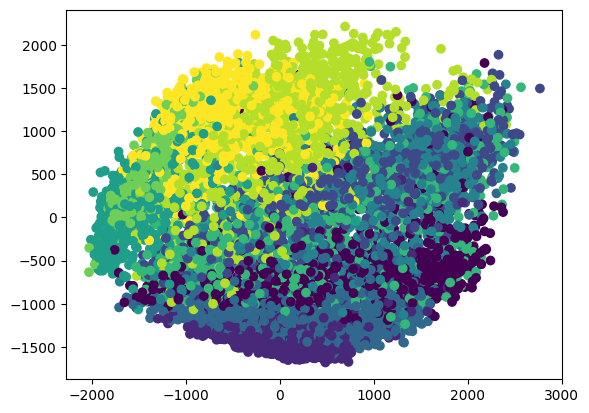

In [16]:
plt.scatter(train_feature[:,0],train_feature[:,1],c=train_label)

In [17]:
pca_f=PCA(n_components=20)
pca_f.fit(train_data)

PCA(n_components=20)

In [18]:
train_pca=pca_f.transform(train_data)

In [19]:
LogReg=LogisticRegression(solver='lbfgs')
LogReg.fit(train_pca,train_label)

c:\users\admin\pycharmprojects\pythonproject5\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
test_pca=pca_f.transform(test_data)

In [21]:
LogReg.score(test_pca,test_label)

0.8016833333333333

In [22]:
accuracy_score(test_label,LogReg.predict(test_pca))

0.8016833333333333